In [1]:
##https://genviz.org/module-04-expression/0004/02/01/DifferentialExpression/

#________Packgaes______________#
library("TCGAbiolinks") # bioconductor package
library("SummarizedExperiment") # bioconductor package
library("DESeq2") # bioconductor package
library("IHW") # bioconductor package
library("biomaRt") # bioconductor package
library("apeglm") # bioconductor package
library("pheatmap") # CRAN package
library("RColorBrewer") # CRAN package
library("PCAtools") # bioconductor package
library(reshape2) # CRAN package


Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [2]:
#install.packages("TCGAbiolinks")
#BiocManager::install("PCAtools")


In [3]:
#BiocManager::install("TCGAbiolinks")
#BiocManager::install("IHW")


In [7]:
# Read in the raw read counts
rawCounts <- read.delim("http://genomedata.org/gen-viz-workshop/intro_to_deseq2/tutorial/E-GEOD-50760-raw-counts.tsv")
head(rawCounts)

,Gene.ID,Gene.Name,SRR975551,SRR975552,SRR975553,SRR975554,SRR975555,SRR975556,SRR975557,SRR975558,⋯,SRR975595,SRR975596,SRR975597,SRR975598,SRR975599,SRR975600,SRR975601,SRR975602,SRR975603,SRR975604
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003,TSPAN6,6617,1352,1492,3390,1464,1251,207,1333,⋯,2786,1717,1691,6192,722,680,2608,2436,1739,2134
2,ENSG00000000005,TNMD,69,1,20,23,12,4,20,2,⋯,18,7,10,40,14,1,16,0,2,7
3,ENSG00000000419,DPM1,2798,714,510,1140,1667,322,273,621,⋯,852,1095,1066,1273,405,597,974,1000,1287,1250
4,ENSG00000000457,SCYL3,486,629,398,239,383,290,164,452,⋯,244,156,256,422,95,255,331,165,347,349
5,ENSG00000000460,C1orf112,466,342,73,227,193,35,38,184,⋯,121,105,172,293,73,148,180,160,288,100
6,ENSG00000000938,FGR,75,95,158,107,135,75,236,254,⋯,81,150,148,72,111,579,108,65,593,643


In [8]:
# Read in the sample mappings
sampleData <- read.delim("http://genomedata.org/gen-viz-workshop/intro_to_deseq2/tutorial/E-GEOD-50760-experiment-design.tsv")
head(sampleData)



,Run,Sample.Characteristic.biopsy.site.,Sample.Characteristic.Ontology.Term.biopsy.site.,Sample.Characteristic.disease.,Sample.Characteristic.Ontology.Term.disease.,Sample.Characteristic.disease.staging.,Sample.Characteristic.Ontology.Term.disease.staging.,Sample.Characteristic.individual.,Sample.Characteristic.Ontology.Term.individual.,Sample.Characteristic.organism.,Sample.Characteristic.Ontology.Term.organism.,Sample.Characteristic.organism.part.,Sample.Characteristic.Ontology.Term.organism.part.,Factor.Value.biopsy.site.,Factor.Value.Ontology.Term.biopsy.site.,Analysed
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR975551,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_2,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
2,SRR975552,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_3,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
3,SRR975553,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_5,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
4,SRR975554,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_6,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
5,SRR975555,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_7,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
6,SRR975556,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_8,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes


In [9]:
# Also save a copy for later
sampleData_v2 <- sampleData

In [10]:
# Convert count data to a matrix of appropriate form that DEseq2 can read
geneID <- rawCounts$Gene.ID
sampleIndex <- grepl("SRR\\d+", colnames(rawCounts))
rawCounts <- as.matrix(rawCounts[,sampleIndex])
rownames(rawCounts) <- geneID
head(rawCounts)

,SRR975551,SRR975552,SRR975553,SRR975554,SRR975555,SRR975556,SRR975557,SRR975558,SRR975559,SRR975560,⋯,SRR975595,SRR975596,SRR975597,SRR975598,SRR975599,SRR975600,SRR975601,SRR975602,SRR975603,SRR975604
ENSG00000000003,6617,1352,1492,3390,1464,1251,207,1333,2126,1799,⋯,2786,1717,1691,6192,722,680,2608,2436,1739,2134
ENSG00000000005,69,1,20,23,12,4,20,2,3,6,⋯,18,7,10,40,14,1,16,0,2,7
ENSG00000000419,2798,714,510,1140,1667,322,273,621,1031,677,⋯,852,1095,1066,1273,405,597,974,1000,1287,1250
ENSG00000000457,486,629,398,239,383,290,164,452,172,229,⋯,244,156,256,422,95,255,331,165,347,349
ENSG00000000460,466,342,73,227,193,35,38,184,174,68,⋯,121,105,172,293,73,148,180,160,288,100
ENSG00000000938,75,95,158,107,135,75,236,254,121,107,⋯,81,150,148,72,111,579,108,65,593,643


In [11]:
# Convert sample variable mappings to an appropriate form that DESeq2 can read
head(sampleData)
rownames(sampleData) <- sampleData$Run
keep <- c("Sample.Characteristic.biopsy.site.", "Sample.Characteristic.individual.")
sampleData <- sampleData[,keep]
colnames(sampleData) <- c("tissueType", "individualID")
sampleData$individualID <- factor(sampleData$individualID)
head(sampleData)


,Run,Sample.Characteristic.biopsy.site.,Sample.Characteristic.Ontology.Term.biopsy.site.,Sample.Characteristic.disease.,Sample.Characteristic.Ontology.Term.disease.,Sample.Characteristic.disease.staging.,Sample.Characteristic.Ontology.Term.disease.staging.,Sample.Characteristic.individual.,Sample.Characteristic.Ontology.Term.individual.,Sample.Characteristic.organism.,Sample.Characteristic.Ontology.Term.organism.,Sample.Characteristic.organism.part.,Sample.Characteristic.Ontology.Term.organism.part.,Factor.Value.biopsy.site.,Factor.Value.Ontology.Term.biopsy.site.,Analysed
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR975551,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_2,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
2,SRR975552,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_3,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
3,SRR975553,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_5,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
4,SRR975554,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_6,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
5,SRR975555,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_7,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
6,SRR975556,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NA,AMC_8,NA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes


,tissueType,individualID
,<chr>,<fct>
SRR975551,primary tumor,AMC_2
SRR975552,primary tumor,AMC_3
SRR975553,primary tumor,AMC_5
SRR975554,primary tumor,AMC_6
SRR975555,primary tumor,AMC_7
SRR975556,primary tumor,AMC_8


In [12]:
# Put the columns of the count data in the same order as rows names of the sample mapping, then make sure it worked
rawCounts <- rawCounts[,unique(rownames(sampleData))]
all(colnames(rawCounts) == rownames(sampleData))

[1] TRUE

In [13]:
# rename the tissue types
rename_tissues <- function(x){
  x <- switch(as.character(x), "normal"="normal-looking surrounding colonic epithelium", "primary tumor"="primary colorectal cancer",  "colorectal cancer metastatic in the liver"="metastatic colorectal cancer to the liver")
  return(x)
}
sampleData$tissueType <- unlist(lapply(sampleData$tissueType, rename_tissues))


In [14]:
# Order the tissue types so that it is sensible and make sure the control sample is first: normal sample -> primary tumor -> metastatic tumor
sampleData$tissueType <- factor(sampleData$tissueType, levels=c("normal-looking surrounding colonic epithelium", "primary colorectal cancer", "metastatic colorectal cancer to the liver"))

# Create the DEseq2DataSet object
deseq2Data <- DESeqDataSetFromMatrix(countData=rawCounts, colData=sampleData, design= ~ individualID + tissueType)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [15]:
dim(deseq2Data)
dim(deseq2Data[rowSums(counts(deseq2Data)) > 5, ])


[1] 65217    54

[1] 35179    54

In [16]:
# Perform pre-filtering of the data
deseq2Data <- deseq2Data[rowSums(counts(deseq2Data)) > 5, ]

In [18]:
# Install and load the library
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("BiocParallel", version = "3.8")

# Register the number of cores to use
library(BiocParallel)
register(MulticoreParam(4))


Warning message:
“package ‘BiocParallel’ was built under R version 4.2.2”


In [19]:
# 1. Run pipeline for differential expression steps (if you set up parallel processing, set parallel = TRUE here)
deseq2Data <- DESeq(deseq2Data)

# 2. Load the R environment with this object from the web (optional)
# load(url("http://genomedata.org/gen-viz-workshop/intro_to_deseq2/tutorial/deseq2Data_v1.RData"))

# 3. Download the .Rdata file and load directly(optional)
# load("deseq2Data_v1.RData")


estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This 

In [20]:
# Extract differential expression results
# For "tissueType" perform primary vs normal comparison
deseq2Results <- results(deseq2Data, contrast=c("tissueType", "primary colorectal cancer", "normal-looking surrounding colonic epithelium"))

# View summary of results
summary(deseq2Results)


out of 35179 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4816, 14%
LFC < 0 (down)     : 5718, 16%
outliers [1]       : 0, 0%
low counts [2]     : 10231, 29%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



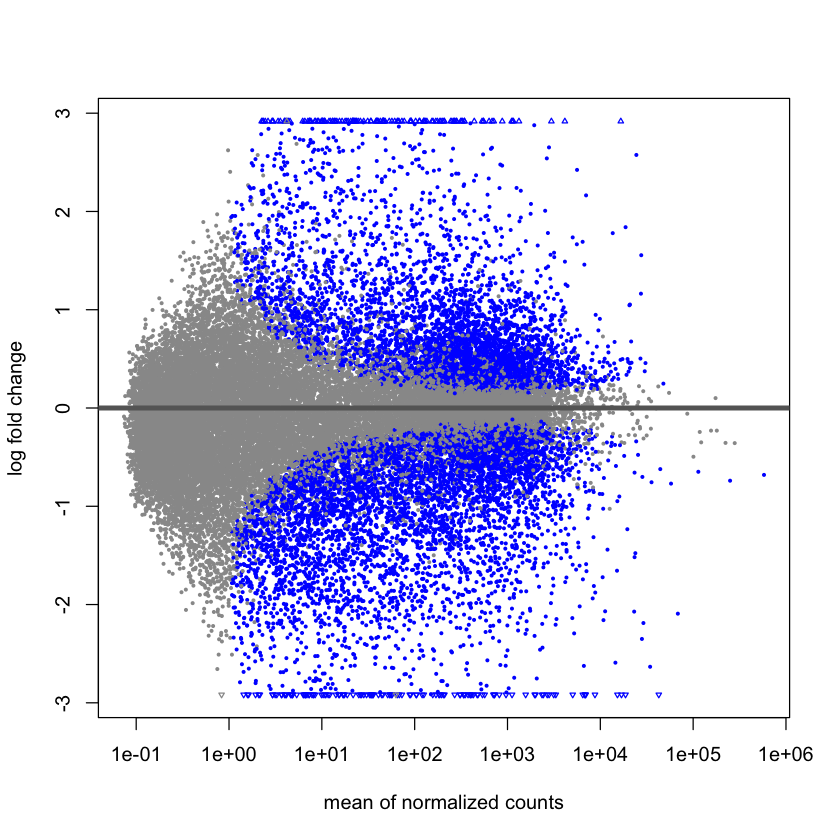

In [21]:
# Using DEseq2 built in method
plotMA(deseq2Results)

In [22]:
# Load libraries
# install.packages(c("ggplot2", "scales", "viridis"))
library(ggplot2)
library(scales) # needed for oob parameter
library(viridis)

# Coerce to a data frame
deseq2ResDF <- as.data.frame(deseq2Results)



Attaching package: ‘scales’


The following object is masked from ‘package:IHW’:

    alpha


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [23]:
# Examine this data frame
head(deseq2ResDF)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,1824.88077,0.2319793,0.1754965,1.3218460,1.862194e-01,3.163423e-01
ENSG00000000005,10.85195,-0.3581575,0.4171716,-0.8585377,3.905956e-01,5.420883e-01
ENSG00000000419,725.17340,0.7034028,0.1319274,5.3317413,9.727544e-08,3.812710e-06
ENSG00000000457,311.35784,-0.2259470,0.1094811,-2.0637992,3.903676e-02,9.389795e-02
ENSG00000000460,126.36193,1.0474994,0.2050559,5.1083599,3.249672e-07,9.537979e-06
ENSG00000000938,163.15327,0.3837251,0.2277006,1.6852175,9.194662e-02,1.836724e-01


In [24]:
# Set a boolean column for significance
deseq2ResDF$significant <- ifelse(deseq2ResDF$padj < .1, "Significant", NA)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


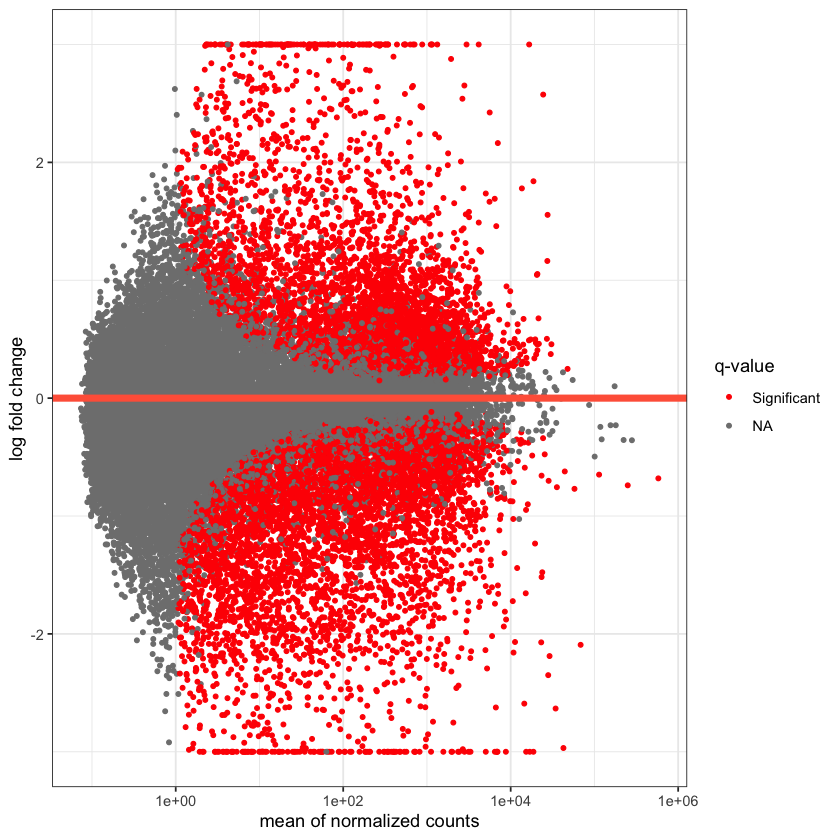

In [25]:
# Plot the results similar to DEseq2
ggplot(deseq2ResDF, aes(baseMean, log2FoldChange, colour=significant)) + geom_point(size=1) + scale_y_continuous(limits=c(-3, 3), oob=squish) + scale_x_log10() + geom_hline(yintercept = 0, colour="tomato1", size=2) + labs(x="mean of normalized counts", y="log fold change") + scale_colour_manual(name="q-value", values=("Significant"="red"), na.value="grey50") + theme_bw()


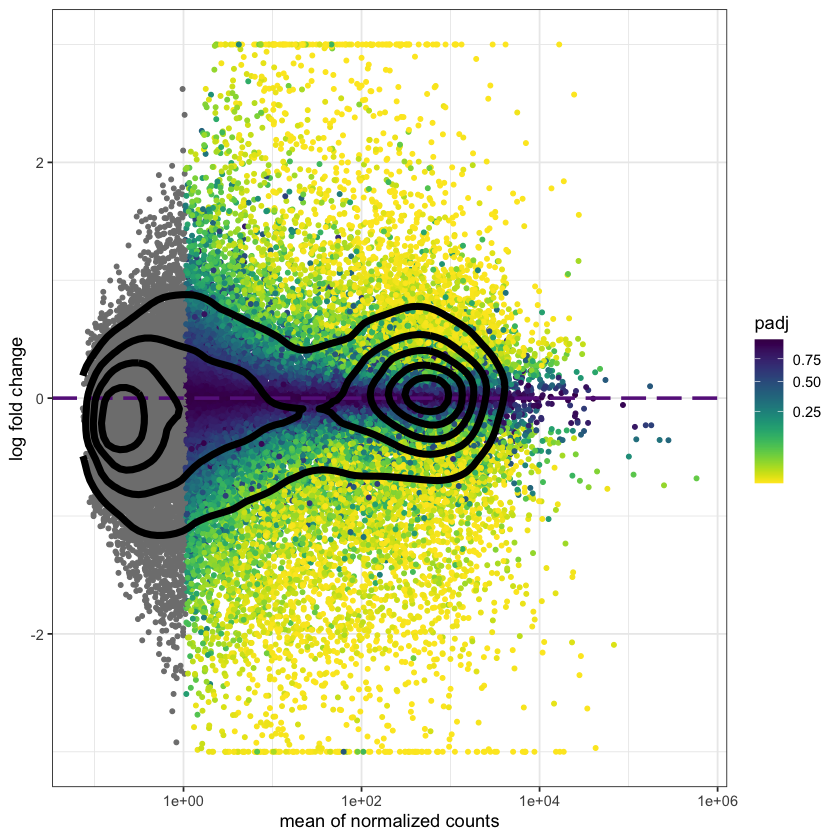

In [26]:
# Let's add some more detail
ggplot(deseq2ResDF, aes(baseMean, log2FoldChange, colour=padj)) + geom_point(size=1) + scale_y_continuous(limits=c(-3, 3), oob=squish) + scale_x_log10() + geom_hline(yintercept = 0, colour="darkorchid4", size=1, linetype="longdash") + labs(x="mean of normalized counts", y="log fold change") + scale_colour_viridis(direction=-1, trans='sqrt') + theme_bw() + geom_density_2d(colour="black", size=2)


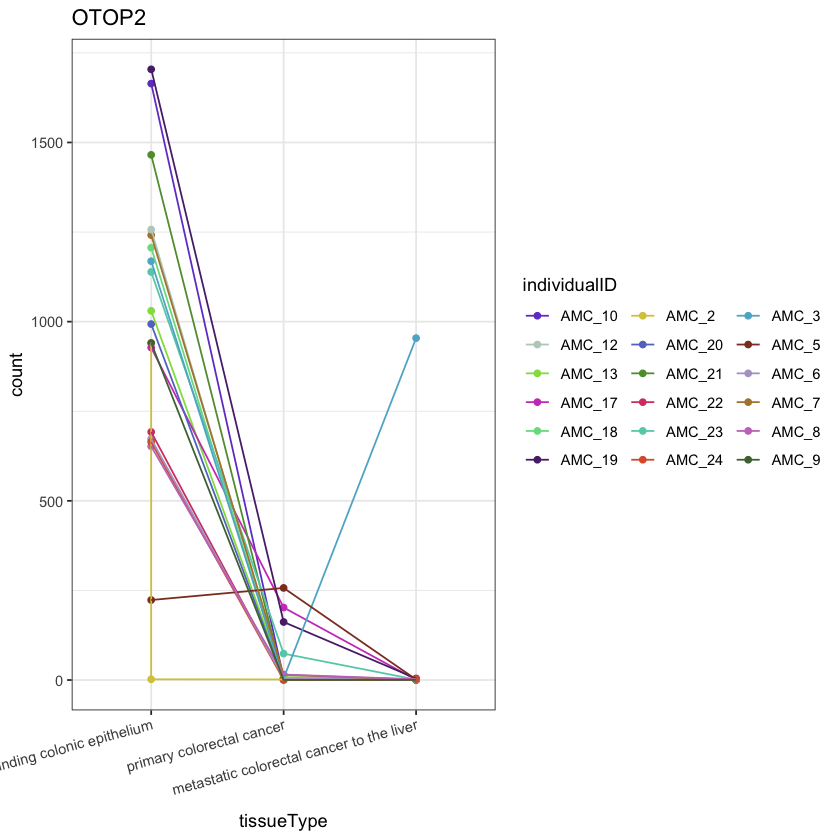

In [27]:
# Extract counts for the gene otop2
otop2Counts <- plotCounts(deseq2Data, gene="ENSG00000183034", intgroup=c("tissueType", "individualID"), returnData=TRUE)

# Plot the data using ggplot2
colourPallette <- c("#7145cd","#bbcfc4","#90de4a","#cd46c1","#77dd8e","#592b79","#d7c847","#6378c9","#619a3c","#d44473","#63cfb6","#dd5d36","#5db2ce","#8d3b28","#b1a4cb","#af8439","#c679c0","#4e703f","#753148","#cac88e","#352b48","#cd8d88","#463d25","#556f73")
ggplot(otop2Counts, aes(x=tissueType, y=count, colour=individualID, group=individualID)) + geom_point() + geom_line() + theme_bw() + theme(axis.text.x=element_text(angle=15, hjust=1)) + scale_colour_manual(values=colourPallette) + guides(colour=guide_legend(ncol=3)) + ggtitle("OTOP2")

In [28]:
deseq2ResDF["ENSG00000183034",]
rawCounts["ENSG00000183034",]
normals=row.names(sampleData[sampleData[,"tissueType"]=="normal-looking surrounding colonic epithelium",])
primaries=row.names(sampleData[sampleData[,"tissueType"]=="primary colorectal cancer",])
rawCounts["ENSG00000183034",normals]
rawCounts["ENSG00000183034",primaries]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,significant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000183034,375.7911,-7.337968,0.748847,-9.799022,1.136808e-22,4.051583e-19,Significant


SRR975551 SRR975552 SRR975553 SRR975554 SRR975555 SRR975556 SRR975557 SRR975558 
        2         6       250         4        19        11         0         7 
SRR975559 SRR975560 SRR975561 SRR975562 SRR975563 SRR975564 SRR975565 SRR975566 
        0         8       159         0       235         1         1         1 
SRR975567 SRR975568 SRR975569 SRR975570 SRR975571 SRR975572 SRR975573 SRR975574 
       84         0      1281       620       335       798      1058       505 
SRR975575 SRR975576 SRR975577 SRR975578 SRR975579 SRR975580 SRR975581 SRR975582 
      861      1321      1336       736       517      1418      1337      1013 
SRR975583 SRR975584 SRR975585 SRR975586 SRR975587 SRR975588 SRR975589 SRR975590 
     1397       613      1251       721         2      1368         1         1 
SRR975591 SRR975592 SRR975593 SRR975594 SRR975595 SRR975596 SRR975597 SRR975598 
        1         1         0         0         0         2         0         2 
SRR975599 SRR975600 SRR975601 SRR975602 SRR975603 SRR975604 
        2         2         0         0         1         3

SRR975569 SRR975570 SRR975571 SRR975572 SRR975573 SRR975574 SRR975575 SRR975576 
     1281       620       335       798      1058       505       861      1321 
SRR975577 SRR975578 SRR975579 SRR975580 SRR975581 SRR975582 SRR975583 SRR975584 
     1336       736       517      1418      1337      1013      1397       613 
SRR975585 SRR975586 SRR975587 
     1251       721         2

SRR975551 SRR975552 SRR975553 SRR975554 SRR975555 SRR975556 SRR975557 SRR975558 
        2         6       250         4        19        11         0         7 
SRR975559 SRR975560 SRR975561 SRR975562 SRR975563 SRR975564 SRR975565 SRR975566 
        0         8       159         0       235         1         1         1 
SRR975567 SRR975568 
       84         0

In [29]:
# Transform count data using the variance stablilizing transform
deseq2VST <- vst(deseq2Data)


In [30]:
# Convert the DESeq transformed object to a data frame
deseq2VST <- assay(deseq2VST)
deseq2VST <- as.data.frame(deseq2VST)
deseq2VST$Gene <- rownames(deseq2VST)
head(deseq2VST)


,SRR975551,SRR975552,SRR975553,SRR975554,SRR975555,SRR975556,SRR975557,SRR975558,SRR975559,SRR975560,⋯,SRR975596,SRR975597,SRR975598,SRR975599,SRR975600,SRR975601,SRR975602,SRR975603,SRR975604,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003,11.923929,9.968500,10.588833,11.791039,10.058138,10.737563,8.267878,9.835585,10.817518,10.757317,⋯,10.657266,10.812194,12.409812,10.424530,9.227771,11.185892,11.654602,10.240971,10.592443,ENSG00000000003
ENSG00000000005,5.625681,2.799376,4.866074,5.031436,4.065530,3.717037,5.236297,2.998960,3.269549,3.755656,⋯,3.849417,4.232950,5.459134,5.139221,2.848146,4.502146,2.232901,3.005591,3.666156,ENSG00000000005
ENSG00000000419,10.686895,9.059366,9.056915,10.226302,10.243933,8.802204,8.656613,8.750360,9.781350,9.360215,⋯,10.013052,10.150926,10.137215,9.598121,9.043083,9.774641,10.376102,9.810639,9.826985,ENSG00000000419
ENSG00000000457,8.199791,8.879902,8.706264,8.013961,8.158745,8.654508,7.943242,8.303669,7.271484,7.835688,⋯,7.277367,8.129814,8.568186,7.561362,7.849440,8.247018,7.826785,7.959503,8.023970,ENSG00000000457
ENSG00000000460,8.141111,8.024470,6.392902,7.942364,7.214920,5.820591,5.998354,7.066791,7.287183,6.212864,⋯,6.746588,7.579064,8.057261,7.202222,7.105346,7.404384,7.784218,7.701531,6.340575,ENSG00000000460
ENSG00000000938,5.725709,6.301239,7.421013,6.916156,6.736584,6.794418,8.451694,7.504600,6.799352,6.802135,⋯,7.224172,7.373415,6.175141,7.775770,8.999707,6.718028,6.568981,8.710157,8.881872,ENSG00000000938


In [31]:
# Keep only the significantly differentiated genes where the fold-change was at least 3
sigGenes <- rownames(deseq2ResDF[deseq2ResDF$padj <= .05 & abs(deseq2ResDF$log2FoldChange) > 3,])
deseq2VST <- deseq2VST[deseq2VST$Gene %in% sigGenes,]


In [32]:
# Convert the VST counts to long format for ggplot2
library(reshape2)


In [33]:
# First compare wide vs long version
deseq2VST_wide <- deseq2VST
deseq2VST_long <- melt(deseq2VST, id.vars=c("Gene"))


In [34]:
head(deseq2VST_wide)
head(deseq2VST_long)


,SRR975551,SRR975552,SRR975553,SRR975554,SRR975555,SRR975556,SRR975557,SRR975558,SRR975559,SRR975560,⋯,SRR975596,SRR975597,SRR975598,SRR975599,SRR975600,SRR975601,SRR975602,SRR975603,SRR975604,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000007306,10.568338,9.159074,16.233798,10.131600,13.751881,12.519868,5.667957,12.776169,6.144317,14.304986,⋯,8.851557,11.164379,12.652243,10.865647,7.897514,7.389139,6.984942,6.288510,7.637623,ENSG00000007306
ENSG00000012504,3.231426,3.345376,8.403741,3.176825,4.193719,6.522882,3.022599,4.199691,3.085199,7.112992,⋯,4.423801,6.777223,6.882624,6.437264,7.620326,8.989993,4.231262,8.527824,8.521452,ENSG00000012504
ENSG00000015413,11.169901,10.657855,5.582772,14.553933,11.907716,6.104372,5.344300,4.457055,12.167876,9.521065,⋯,13.036171,12.108500,13.100530,13.421117,10.612505,7.218498,13.316369,10.100135,11.060091,ENSG00000015413
ENSG00000016602,8.153040,6.466539,13.864836,8.013961,10.864525,8.870742,4.607561,9.224555,4.510159,12.528673,⋯,3.739617,4.788758,4.546585,4.675336,5.325398,4.817130,5.751074,5.158338,4.846432,ENSG00000016602
ENSG00000029559,3.101820,4.379893,2.232901,4.131232,4.364544,2.232901,2.232901,6.411503,5.578436,5.112705,⋯,7.862908,3.387194,2.851402,3.486933,5.045923,3.451599,6.825973,7.203106,4.361161,ENSG00000029559
ENSG00000034971,2.232901,2.799376,6.955727,2.232901,2.232901,2.232901,7.993170,2.232901,2.839882,3.632837,⋯,2.232901,2.910991,2.232901,2.232901,2.232901,2.232901,2.232901,2.782500,2.232901,ENSG00000034971


,Gene,variable,value
,<chr>,<fct>,<dbl>
1,ENSG00000007306,SRR975551,10.568338
2,ENSG00000012504,SRR975551,3.231426
3,ENSG00000015413,SRR975551,11.169901
4,ENSG00000016602,SRR975551,8.153040
5,ENSG00000029559,SRR975551,3.101820
6,ENSG00000034971,SRR975551,2.232901


In [35]:
# Now overwrite our original data frame with the long format
deseq2VST <- melt(deseq2VST, id.vars=c("Gene"))


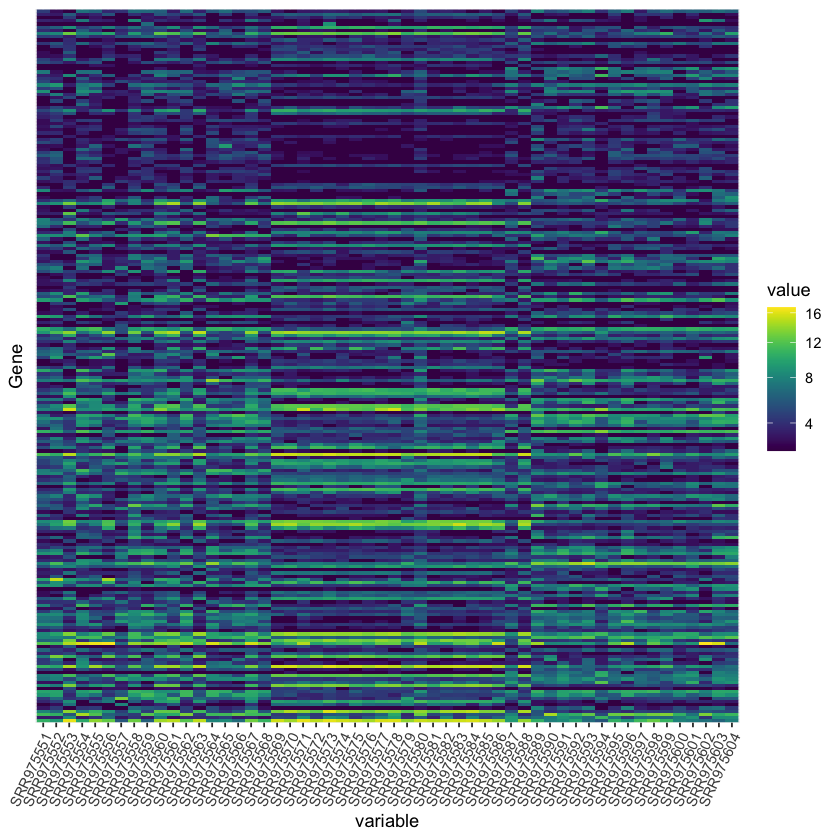

In [36]:
# Make a heatmap
heatmap <- ggplot(deseq2VST, aes(x=variable, y=Gene, fill=value)) + geom_raster() + scale_fill_viridis(trans="sqrt") + theme(axis.text.x=element_text(angle=65, hjust=1), axis.text.y=element_blank(), axis.ticks.y=element_blank())
heatmap

In [37]:
# Convert the significant genes back to a matrix for clustering
deseq2VSTMatrix <- dcast(deseq2VST, Gene ~ variable)
rownames(deseq2VSTMatrix) <- deseq2VSTMatrix$Gene
deseq2VSTMatrix$Gene <- NULL


In [38]:
# Compute a distance calculation on both dimensions of the matrix
distanceGene <- dist(deseq2VSTMatrix)
distanceSample <- dist(t(deseq2VSTMatrix))


In [39]:
# Cluster based on the distance calculations
clusterGene <- hclust(distanceGene, method="average")
clusterSample <- hclust(distanceSample, method="average")


In [40]:
# Construct a dendogram for samples
install.packages("ggdendro")
library(ggdendro)
sampleModel <- as.dendrogram(clusterSample)
sampleDendrogramData <- segment(dendro_data(sampleModel, type = "rectangle"))
sampleDendrogram <- ggplot(sampleDendrogramData) + geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + theme_dendro()


The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpbZI7HH/downloaded_packages


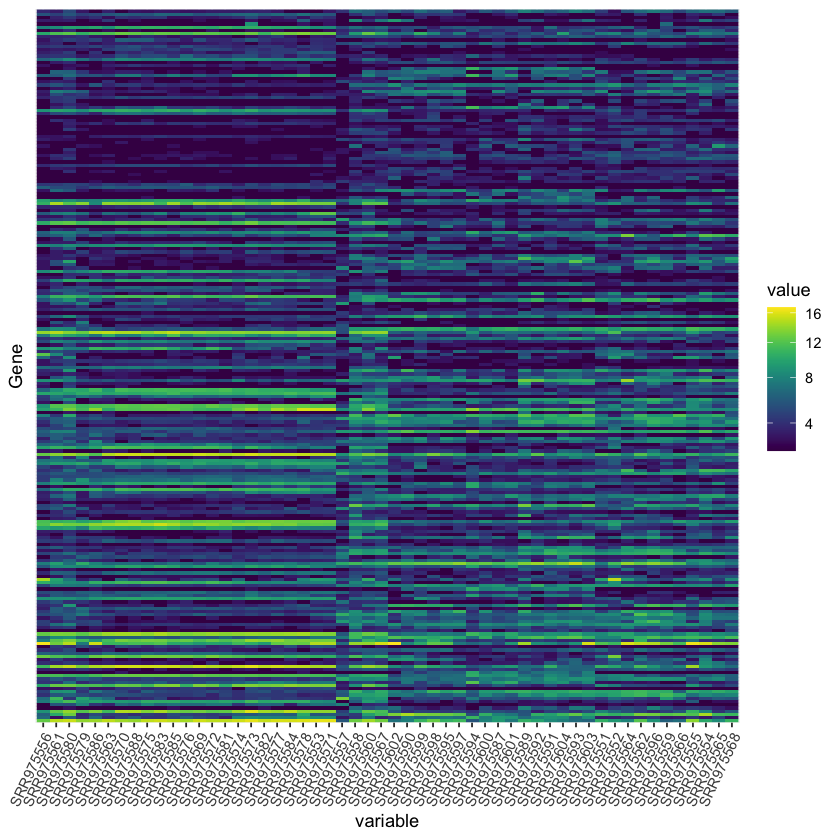

In [41]:
# Re-factor samples for ggplot2
deseq2VST$variable <- factor(deseq2VST$variable, levels=clusterSample$labels[clusterSample$order])

# Construct the heatmap. note that at this point we have only clustered the samples NOT the genes
heatmap <- ggplot(deseq2VST, aes(x=variable, y=Gene, fill=value)) + geom_raster() + scale_fill_viridis(trans="sqrt") + theme(axis.text.x=element_text(angle=65, hjust=1), axis.text.y=element_blank(), axis.ticks.y=element_blank())
heatmap


The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpbZI7HH/downloaded_packages



Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




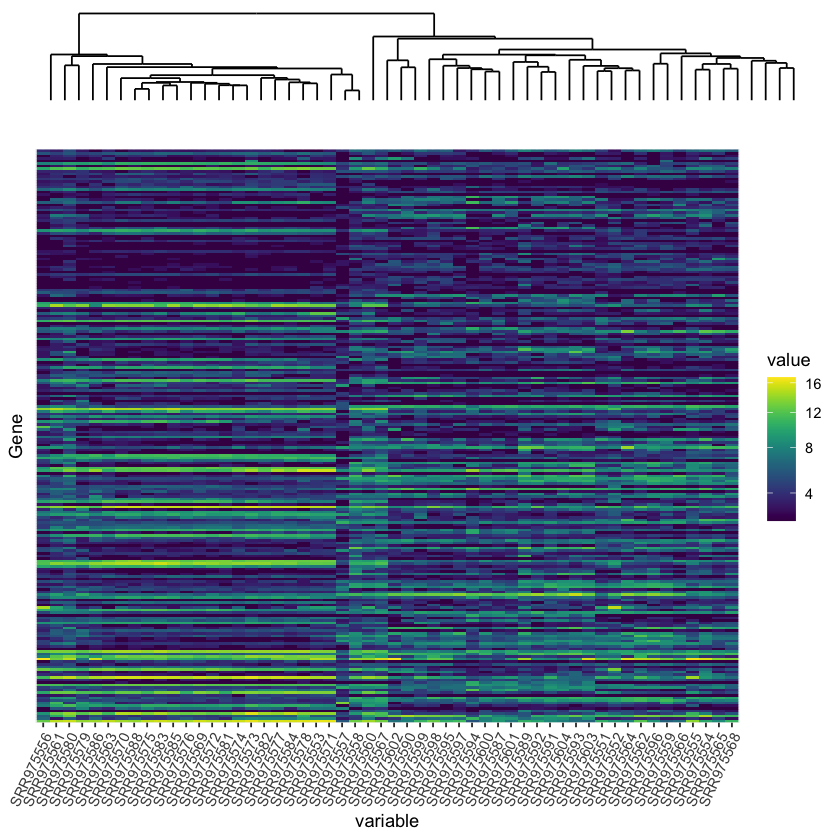

In [42]:
# Combine the dendrogram and the heatmap
install.packages("gridExtra")
library(gridExtra)
grid.arrange(sampleDendrogram, heatmap, ncol=1, heights=c(1,5))

In [43]:
# Load in libraries necessary for modifying plots
#install.packages("gtable")
library(gtable)
library(grid)

In [44]:
# Modify the ggplot objects
sampleDendrogram_1 <- sampleDendrogram + scale_x_continuous(expand=c(.0085, .0085)) + scale_y_continuous(expand=c(0, 0))
heatmap_1 <- heatmap + scale_x_discrete(expand=c(0, 0)) + scale_y_discrete(expand=c(0, 0))


In [45]:
# Convert both grid based objects to grobs
sampleDendrogramGrob <- ggplotGrob(sampleDendrogram_1)
heatmapGrob <- ggplotGrob(heatmap_1)

In [46]:
# Check the widths of each grob
sampleDendrogramGrob$widths
heatmapGrob$widths


[1] 5.5points            0cm                  0cm                 
[4] sum(0cm, 2.75points) 1null                0cm                 
[7] 0cm                  0points              5.5points           

 [1] 5.5points            0cm                  1grobwidth          
 [4] sum(0cm, 2.75points) 1null                0cm                 
 [7] 0cm                  11points             1.54256867579909cm  
[10] 0points              5.5points           

In [47]:
# Add in the missing columns
sampleDendrogramGrob <- gtable_add_cols(sampleDendrogramGrob, heatmapGrob$widths[7], 6)
sampleDendrogramGrob <- gtable_add_cols(sampleDendrogramGrob, heatmapGrob$widths[8], 7)


In [48]:
# Make sure every width between the two grobs is the same
maxWidth <- unit.pmax(sampleDendrogramGrob$widths, heatmapGrob$widths)
sampleDendrogramGrob$widths <- as.list(maxWidth)
heatmapGrob$widths <- as.list(maxWidth)


In [49]:
# Arrange the grobs into a plot
finalGrob <- arrangeGrob(sampleDendrogramGrob, heatmapGrob, ncol=1, heights=c(2,5))


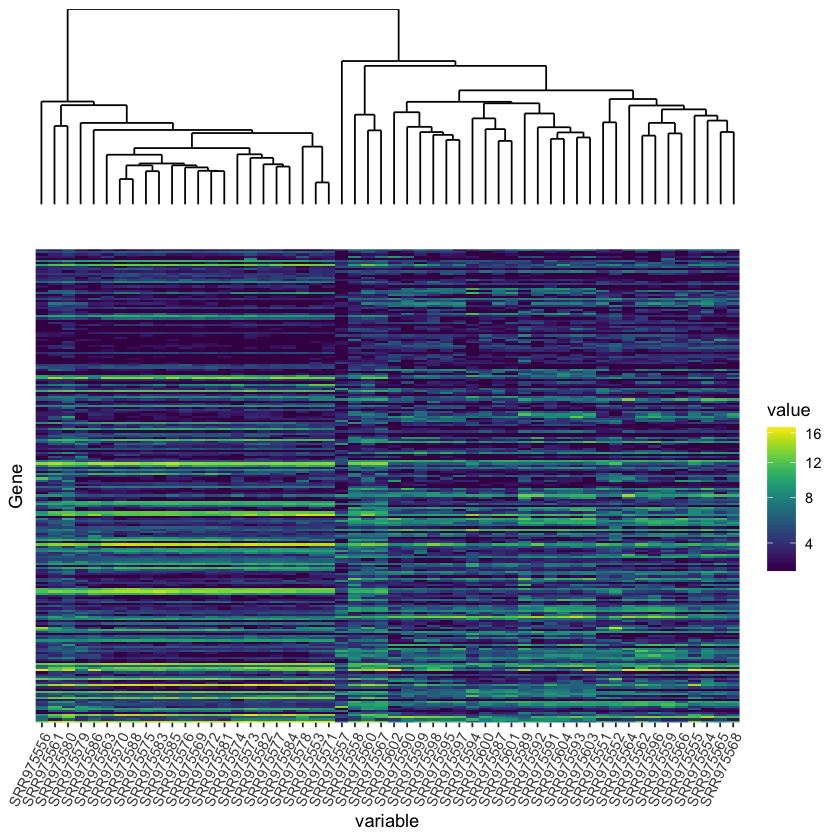

In [50]:
# Draw the plot
grid.draw(finalGrob)


In [51]:
# Re-order the sample data to match the clustering we did
sampleData_v2$Run <- factor(sampleData_v2$Run, levels=clusterSample$labels[clusterSample$order])


In [52]:
# Construct a plot to show the clinical data
colours <- c("#743B8B", "#8B743B", "#8B3B52")
sampleClinical <- ggplot(sampleData_v2, aes(x=Run, y=1, fill=Sample.Characteristic.biopsy.site.)) + geom_tile() + scale_x_discrete(expand=c(0, 0)) + scale_y_discrete(expand=c(0, 0)) + scale_fill_manual(name="Tissue", values=colours) + theme_void()

In [53]:
# Convert the clinical plot to a grob
sampleClinicalGrob <- ggplotGrob(sampleClinical)


In [54]:
# Make sure every width between all grobs is the same
maxWidth <- unit.pmax(sampleDendrogramGrob$widths, heatmapGrob$widths, sampleClinicalGrob$widths)
sampleDendrogramGrob$widths <- as.list(maxWidth)
heatmapGrob$widths <- as.list(maxWidth)
sampleClinicalGrob$widths <- as.list(maxWidth)

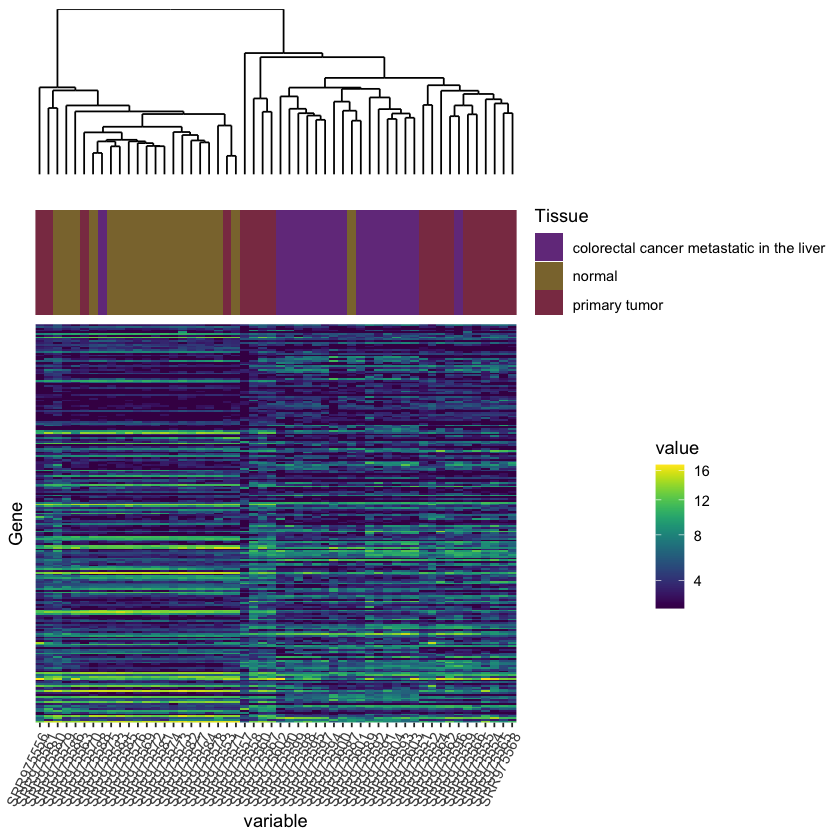

In [55]:
# Arrange and output the final plot
finalGrob <- arrangeGrob(sampleDendrogramGrob, sampleClinicalGrob, heatmapGrob, ncol=1, heights=c(2,1,5))
grid.draw(finalGrob)